# Tutorial
- Train / test on Monk datasets
    - SGD
    - BFGS
    - L-BFGS

- Train / test on ML-Cup dataset
    - SGD
    - BFGS
    - L-BFGS

- Perform grid search
    - SGD
    - BFGS
    - L-BFGS
- Save and load network parametes

In [1]:
from Validation import *
from time import time
from utils import *
from grid_search import *
from Neural_network import *

# Monk 1,2,3 with SGD, BFGS and L-BFGS

### Load  Monk dataset

In [2]:
# choose monk dataset
monk = str(1)
columns = ['label', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'id']

# 1. traning set
train_file = "../monk_datasets/monks-" + monk + ".train"
train_data = pd.read_csv(train_file, delim_whitespace=True, header=None)
train_data.columns = columns

# 2. test set
test_file = "../monk_datasets/monks-" + monk + ".test"
test_data = pd.read_csv(test_file, delim_whitespace=True, header=None)
test_data.columns = columns

# 3. getting patterns and labels
encoding = [3, 3, 2, 3, 4, 2]
features = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']
train_patterns, test_patterns = decode_patterns(encoding, features, train_data, test_data)
train_labels, test_labels = transform_labels(train_data, test_data)

# SGD

### SGD - define network and parameters

In [6]:
# define architecture and hyperparameters
architecture = [17, 20, 20, 1]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, TanHNeuron]
network = Network(architecture, neurons)
loss_object = SquaredError("tangentH")
learning_rate = 0.01
momentum = 0.9
regularization = 0.0
batch_size = 16
epochs = 200

### SGD - train

In [7]:
tic = time()
# 5. train
loss_train, misclass_train, \
loss_test, misclass_test, norm_gradients = network.train_SGD(x_train=train_patterns, 
                                         y_train=train_labels, 
                                         x_test=test_patterns,
                                         y_test=test_labels,
                                         lossObject=loss_object,
                                         epochs=epochs, 
                                         learning_rate=learning_rate, 
                                         batch_size=batch_size,
                                         momentum=momentum, 
                                        regularization=regularization)
toc = time()

### SGD - learning curves

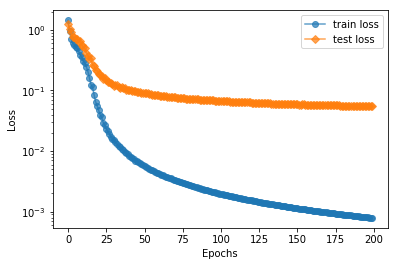

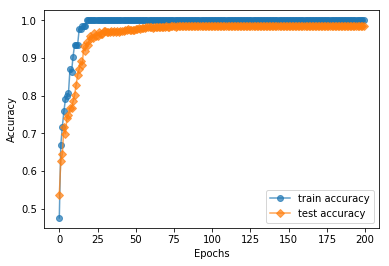

accuracy train: 1.0
accuracy test: 0.983796296296
error train: 0.000790179071877
error test: 0.0551122775892
time: 70.5651218891
norm gradient last: 0.0829504813392


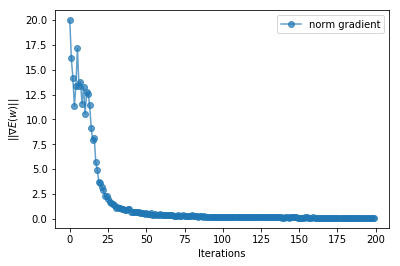

In [9]:
plot_train_test_learning_curve(loss_test, loss_train, misclass_test, misclass_train)
print "accuracy train:", 1 - misclass_train[-1]
print "accuracy test:", 1 - misclass_test[-1]
print "error train:", loss_train[-1]
print "error test:", loss_test[-1]
print "time:", (toc-tic)
print "norm gradient last:", norm_gradients[-1]
plot_norm_gradient_vs_iterations(norm_gradients)

# BFGS

### BFGS - define network and parameters

In [3]:
architecture = [17, 20, 20, 1]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, TanHNeuron]
loss_object = SquaredError("tangentH")

c_1 = 1e-4
c_2 = 0.7
theta = 0.5
lambda_ = 0#5 * 1e-2
epsilon = 1 * 1e-3
epochs = 50

network = Network(architecture, neurons)

### BFGS - train

In [4]:
tic = time()
loss_tr, miss_tr, loss_ts, miss_ts, alphas, norm_gradients = network.train_BFGS(train_patterns, train_labels, 
                                                       test_patterns, test_labels,
                                                       theta=theta, c_1=c_1, c_2=c_2, 
                                                       lossObject=loss_object, 
                                                       regularization=lambda_, 
                                                       epochs=epochs, epsilon=epsilon)
toc = time()

### BFGS - learning curves

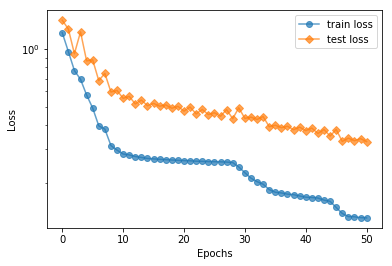

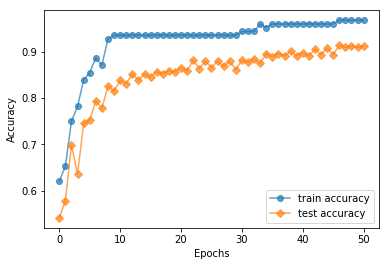

accuracy train: 0.967741935484
accuracy test: 0.912037037037
loss train: 0.131902421981
loss test: 0.329020240452
training time: 90.9021830559
norm gradient last: 0.0829304671726


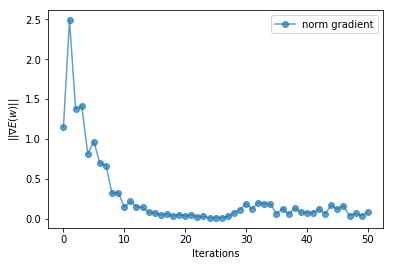

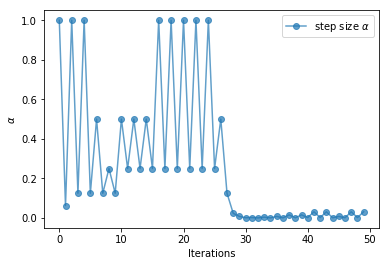

In [5]:
plot_train_test_learning_curve(loss_ts, loss_tr, miss_ts, miss_tr)
print "accuracy train:", 1 - miss_tr[-1]
print "accuracy test:", 1 - miss_ts[-1]
print "loss train:", loss_tr[-1]
print "loss test:", loss_ts[-1]
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients[-1]
plot_norm_gradient_vs_iterations(norm_gradients)
plot_alpha_vs_iterations(alphas)

# L-BFGS

### L-BFGS - define network and parameters

In [9]:
architecture = [17, 20, 20, 1]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, TanHNeuron]
loss_object = SquaredError("tangentH")

c_1 = 1e-5
c_2 = 0.9
theta = 0.7
lambda_ = 0#5 * 1e-2
epsilon = 1 * 1e-2
epochs = 50
m = 10

network = Network(architecture, neurons)

### L-BFGS - train

In [10]:
tic = time()
loss_tr, miss_tr, loss_ts, miss_ts, alphas, norm_gradients = network.train_LBFGS(train_patterns, train_labels,
                                                        test_patterns, test_labels,
                                                        theta=theta, 
                                                        c_1=c_1, 
                                                        c_2=c_2, 
                                                        lossObject=loss_object,
                                                        regularization=lambda_, 
                                                        epochs=epochs, 
                                                        epsilon=epsilon, m=m)
toc = time()

stop: norm gradient, epoch 18


### L-BFGS - learning curves

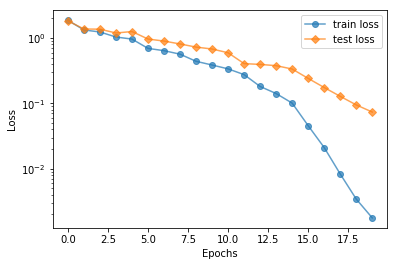

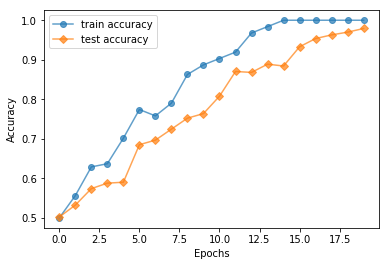

accuracy train: 1.0
accuracy test: 0.979166666667
loss train: 0.00176172005956
loss test: 0.0735605624978
training time: 10.0423510075
norm gradient last: 0.00845955915103


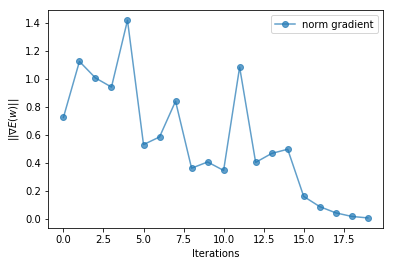

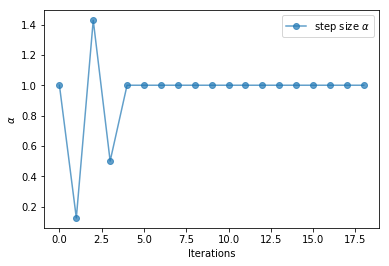

In [11]:
plot_train_test_learning_curve(loss_ts, loss_tr, miss_ts, miss_tr)
print "accuracy train:", 1 - miss_tr[-1]
print "accuracy test:", 1 - miss_ts[-1]
print "loss train:", loss_tr[-1]
print "loss test:", loss_ts[-1]
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients[-1]
plot_norm_gradient_vs_iterations(norm_gradients)
plot_alpha_vs_iterations(alphas)

--------------------------------------
# ML-Cup with SGD, BFGS and L-BFGS

### Load ML-Cup dataset

In [2]:
# 1. read file train set
df = pd.read_csv("../MLCup/ML-CUP17-TR_shuffled.csv", comment='#')
features_col = ["input1","input2","input3","input4","input5",
                "input6","input7", "input8","input9","input10"]
targets_col = ["target_x", "target_y"]

# 2. divide pattern and targets
patterns,labels = divide_patterns_labels(df,features_col,targets_col)

# 3. divide in development set and test set
X_train, Y_train, X_test, Y_test = holdout_cup(patterns,labels, fraction_tr=0.8)

## SGD - cup

In [56]:
architecture = [17, 100, 50, 25, 12, 2]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, TanHNeuron, TanHNeuron, OutputNeuron]
loss_object = EuclideanError()

learning_rate = 0.001
momentum = 0.9
lambda_ = 1 * 1e-3
batch_size = 32
epochs = 50

network = Network(architecture, neurons)

In [57]:
tic = time()
# 5. train
loss_train, miss_train, \
loss_test, miss_test = network.train_SGD(x_train=X_train, 
                                         y_train=Y_train, 
                                         x_test=X_test,
                                         y_test=Y_test,
                                         lossObject=loss_object,
                                         epochs=epochs, 
                                         learning_rate=learning_rate, 
                                         batch_size=batch_size,
                                         momentum=momentum, 
                                        regularization=lambda_)
toc = time()

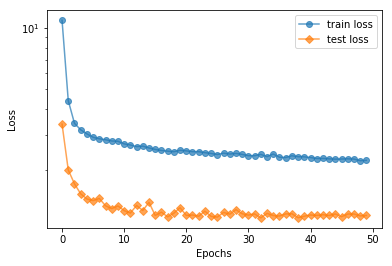

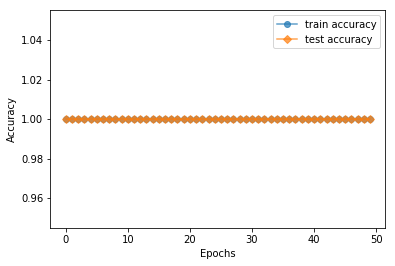

loss train: 2.2405435227
loss test: 1.20117078578
training time: 402.578987122


In [58]:
plot_train_test_learning_curve(loss_test, loss_train, miss_test, miss_train)
print "loss train:", loss_train[-1]
print "loss test:", loss_test[-1]
print "training time:", (toc-tic)

## BFGS - cup

In [6]:
architecture = [17, 100, 50, 25, 12, 2]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, TanHNeuron, TanHNeuron, OutputNeuron]
loss_object = EuclideanError()

c_1 = 1e-6
c_2 = 0.95
theta = 0.5
lambda_ = 1 * 1e-5
epsilon = 1 * 1e-3
epochs = 50

In [7]:
network = Network(architecture, neurons)

tic = time()
loss_tr, miss_tr, loss_ts, miss_ts, _ = network.train_BFGS(X_train, Y_train, 
                                                       X_test, Y_test,
                                                       theta=theta, c_1=c_1, c_2=c_2, 
                                                       lossObject=loss_object, 
                                                       regularization=lambda_, 
                                                       epochs=epochs, epsilon=epsilon)
toc = time()

stop: line search, epoch 8


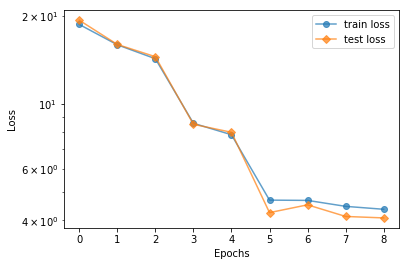

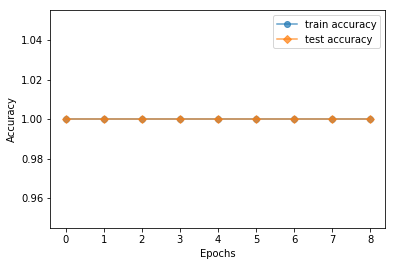

loss train: 4.36378702522
loss test: 4.07720541176
training time: 2158.23130298


In [8]:
plot_train_test_learning_curve(loss_ts, loss_tr, miss_ts, miss_tr)
print "loss train:", loss_tr[-1]
print "loss test:", loss_ts[-1]
print "training time:", (toc-tic)

## L-BFGS - cup

In [9]:
architecture = [17, 100, 50, 25, 12, 2]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, TanHNeuron, TanHNeuron, OutputNeuron]
loss_object = EuclideanError()

c_1 = 1e-5
c_2 = 0.9
theta = 0.5
lambda_ = 5 * 1e-4
epsilon = 1 * 1e-3
epochs = 100
m = 5

network = Network(architecture, neurons)

In [10]:
tic = time()
loss_tr, miss_tr, loss_ts, miss_ts = network.train_LBFGS(X_train, Y_train,
                                                        X_test, Y_test,
                                                        theta=theta, 
                                                        c_1=c_1, 
                                                        c_2=c_2, 
                                                        lossObject=loss_object,
                                                        regularization=lambda_, 
                                                        epochs=epochs, 
                                                        epsilon=epsilon, m=m)
toc = time()

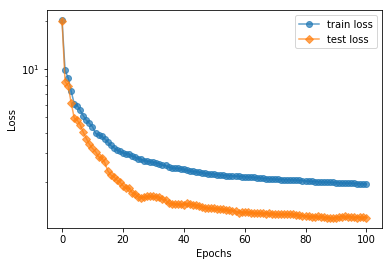

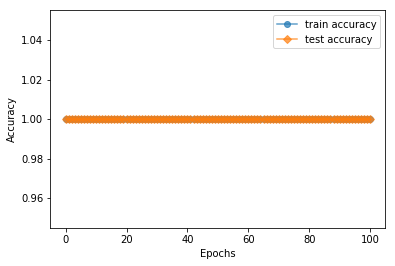

loss train: 1.92803274158
loss test: 1.1919458553
training time: 1683.20427513


In [11]:
plot_train_test_learning_curve(loss_ts, loss_tr, miss_ts, miss_tr)
print "loss train:", loss_tr[-1]
print "loss test:", loss_ts[-1]
print "training time:", (toc-tic)

# Grid search

In [3]:
# directory where to save learning curves
save_directory = './' 
# loss to optimize
loss = SquaredError("tangentH")

In [5]:
# grid search parameters
grid = GridSearchSGDParams(learning_rate = [0.01, 0.001],
                           momentum = [0.5, 0.9], 
                           batch_size = [16, 32], 
                           architecture = [[17, 10, 1]],
                           neurons = [[InputNeuron, TanHNeuron, TanHNeuron]], 
                           regularization = [0.01, 0.001], 
                           epoch = 5)

# execute grid search
grid_search_SGD(grid, loss, train_patterns, train_labels,
                test_patterns, test_labels, n_trials=1, save_in_dir=save_directory)

BEGIN GRID SEARCH SGD: 16 experiments
0 out of 16 experiments
./lr_0,01-mo_0,5-bat:16-reg_0,01-arc_[17,10,1,] got MEE (TR/VL) 0.996697042458 0.952935003466
1 out of 16 experiments
./lr_0,01-mo_0,5-bat:32-reg_0,01-arc_[17,10,1,] got MEE (TR/VL) 1.24688944386 1.18193603068
2 out of 16 experiments
./lr_0,01-mo_0,9-bat:16-reg_0,01-arc_[17,10,1,] got MEE (TR/VL) 0.696347609176 0.851085030904
3 out of 16 experiments
./lr_0,01-mo_0,9-bat:32-reg_0,01-arc_[17,10,1,] got MEE (TR/VL) 0.992644501934 0.896814010533
4 out of 16 experiments
./lr_0,001-mo_0,5-bat:16-reg_0,01-arc_[17,10,1,] got MEE (TR/VL) 1.37265686232 1.36825345306
5 out of 16 experiments
./lr_0,001-mo_0,5-bat:32-reg_0,01-arc_[17,10,1,] got MEE (TR/VL) 1.40270944399 1.28375889656
6 out of 16 experiments
./lr_0,001-mo_0,9-bat:16-reg_0,01-arc_[17,10,1,] got MEE (TR/VL) 1.56830154346 1.2837134541
7 out of 16 experiments
./lr_0,001-mo_0,9-bat:32-reg_0,01-arc_[17,10,1,] got MEE (TR/VL) 1.22679520077 1.0826680412
8 out of 16 experiments
./

In [7]:
grid = GridSearchBFGSParams(c_1=[0.0001], 
                            c_2=[0.9], 
                            theta=[0.9], 
                            regularization=[0.001], 
                            epsilon=[0.001, 0.0001],
                            epoch=5,
                            architecture = [[17, 10, 1]],
                            neurons = [[InputNeuron, TanHNeuron, TanHNeuron]])         

grid_search_BFGS(grid, loss, train_patterns, train_labels,
                 test_patterns, test_labels, n_trials=2, save_in_dir=save_directory)

BEGIN GRID SEARCH BFGS: 2 experiments
0 out of 2 experiments
./c1_0,0001-c2_0,9-theta_0,9-reg_0,001-eps_0,001-arc_[17,10,1,] got MEE (TR/VL) 0.698541458353 0.859128213807
1 out of 2 experiments
./c1_0,0001-c2_0,9-theta_0,9-reg_0,001-eps_0,0001-arc_[17,10,1,] got MEE (TR/VL) 0.621273772173 0.807437181196


In [5]:
grid = GridSearchLBFGSParams(c_1=[0.0001], 
                            c_2=[0.9], 
                            theta=[0.9], 
                            regularization=[0.001], 
                            epsilon=[0.001, 0.0001],
                            m=[10, 20],
                            epoch=5,
                            architecture = [[17, 10, 1]],
                            neurons = [[InputNeuron, TanHNeuron, TanHNeuron]])

grid_search_LBFGS(grid, loss, train_patterns, train_labels,
                  test_patterns, test_labels,
                  n_trials=5, save_in_dir=save_directory)

BEGIN GRID SEARCH L-BFGS: 4 experiments
0 out of 4 experiments
./c1_0,0001-c2_0,9-theta_0,9-reg_0,001-eps_0,001-m_10-arc_[17,10,1,] got MEE (TR/VL) 0.605962597977 0.837691343181
1 out of 4 experiments
./c1_0,0001-c2_0,9-theta_0,9-reg_0,001-eps_0,001-m_20-arc_[17,10,1,] got MEE (TR/VL) 0.632855354419 0.808188047774
2 out of 4 experiments
./c1_0,0001-c2_0,9-theta_0,9-reg_0,001-eps_0,0001-m_10-arc_[17,10,1,] got MEE (TR/VL) 0.623586973766 0.816728571794
3 out of 4 experiments
./c1_0,0001-c2_0,9-theta_0,9-reg_0,001-eps_0,0001-m_20-arc_[17,10,1,] got MEE (TR/VL) 0.614691786069 0.807094575545


## Save & load network parameters

In [12]:
network = Network([2,5,1], [InputNeuron, TanHNeuron, TanHNeuron])   # random initialized
with open("test_weights.csv", "w") as out_file:
    network.dump_weights(out_file)
    
network_2 = Network([2,5,1], [InputNeuron, TanHNeuron, TanHNeuron]) # random initialized
with open("test_weights.csv", "r") as in_file:
    network_2.load_weights(in_file)
    
network.get_weights_as_vector() == network_2.get_weights_as_vector()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)